# Explore here

It's recommended to use this notebook for exploration purposes.

In [36]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://www.mlb.com/stats/san-francisco-giants/all-time-by-season'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
response




<Response [200]>

In [37]:

tables = soup.find_all('table')
table = tables[0]

headers = [th.text.strip() for th in table.find_all('th')]

rows = []
for tr in table.find_all('tr')[1:]: 
    cells = []
    for td in tr.find_all('td'):
       
        cell_text = td.get_text(strip=True)
        cells.append(cell_text)
    
    if len(cells) != len(headers):
        cells.extend([None] * (len(headers) - len(cells)))  
    
    rows.append(cells)

df = pd.DataFrame(rows, columns=headers)
df

,PLAYERPLAYER,YEARYEAR,TEAMTEAM,GG,ABAB,RR,HH,2B2B,3B3B,HRHR,...,16WillieW MaysMaysCF16‌‌‌,17MelM OttOttRF17‌‌‌,17MelM OttOttRF17‌‌‌,19RogersR HornsbyHornsby2B19‌‌‌,20WillieW MaysMaysCF20‌‌‌,21BarryB BondsBondsLF21‌‌‌,22MelM OttOttRF22‌‌‌,23MelM OttOtt3B23‌‌‌,23MelM OttOttRF23‌‌‌,25KevinK MitchellMitchellLF25‌‌‌
0,2004,SF,147,373,129,135,27,3,45,101,...,None,None,None,None,None,None,None,None,None,None
1,2002,SF,143,403,117,149,31,2,46,110,...,None,None,None,None,None,None,None,None,None,None
2,2001,SF,153,476,129,156,32,2,73,137,...,None,None,None,None,None,None,None,None,None,None
3,2003,SF,130,390,111,133,22,1,45,90,...,None,None,None,None,None,None,None,None,None,None
4,1993,SF,159,539,129,181,38,4,46,123,...,None,None,None,None,None,None,None,None,None,None
5,2000,SF,143,480,129,147,28,4,49,106,...,None,None,None,None,None,None,None,None,None,None
6,1969,SF,149,491,101,157,26,2,45,126,...,None,None,None,None,None,None,None,None,None,None
7,1929,NYG,150,545,138,179,37,2,42,151,...,None,None,None,None,None,None,None,None,None,None
8,1954,NYG,151,565,119,195,33,13,41,110,...,None,None,None,None,None,None,None,None,None,None
9,1996,SF,158,517,122,159,27,3,42,129,...,None,None,None,None,None,None,None,None,None,None


In [46]:
from bs4 import BeautifulSoup
import requests

url = "https://www.mlb.com/stats/san-francisco-giants/all-time-by-season"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')

table = tables[0]

columns = []
for abbr in table.find_all('abbr', class_=lambda value: value and value.startswith("bui-text cellheader")):
    column_label = abbr.text.strip()
    columns.append(column_label)
print(columns)

all_rows = []
tr_tags = table.find_all('tr')

for tr in tr_tags[1:]: 
    row = []

    player_name = tr.find('a')
    if player_name:
        row.append(player_name.text.strip())
    else:
        row.append("Unknown Player")  

    for td in tr.find_all('td'):
        row.append(td.text.strip())

    all_rows.append(row)

for row in all_rows:
    print(row)

['PLAYER', 'PLAYER', 'YEAR', 'YEAR', 'TEAM', 'TEAM', 'G', 'G', 'AB', 'AB', 'R', 'R', 'H', 'H', '2B', '2B', '3B', '3B', 'HR', 'HR', 'RBI', 'RBI', 'BB', 'BB', 'SO', 'SO', 'SB', 'SB', 'CS', 'CS', 'AVG', 'AVG', 'OBP', 'OBP', 'SLG', 'SLG', 'OPS', 'OPS']
['BarryB BondsBonds', '2004', 'SF', '147', '373', '129', '135', '27', '3', '45', '101', '232', '41', '6', '1', '.362', '.609', '.812', '1.421']
['BarryB BondsBonds', '2002', 'SF', '143', '403', '117', '149', '31', '2', '46', '110', '198', '47', '9', '2', '.370', '.582', '.799', '1.381']
['BarryB BondsBonds', '2001', 'SF', '153', '476', '129', '156', '32', '2', '73', '137', '177', '93', '13', '3', '.328', '.515', '.863', '1.378']
['BarryB BondsBonds', '2003', 'SF', '130', '390', '111', '133', '22', '1', '45', '90', '148', '58', '7', '0', '.341', '.529', '.749', '1.278']
['BarryB BondsBonds', '1993', 'SF', '159', '539', '129', '181', '38', '4', '46', '123', '126', '79', '29', '12', '.336', '.458', '.677', '1.135']
['BarryB BondsBonds', '2000',

In [50]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('baseball_stats.db')

df_cleaned.to_sql('players_stats', conn, if_exists='replace', index=False)

conn.commit()  
conn.close()

print("Data has been successfully stored in the SQLite database.")

Data has been successfully stored in the SQLite database.


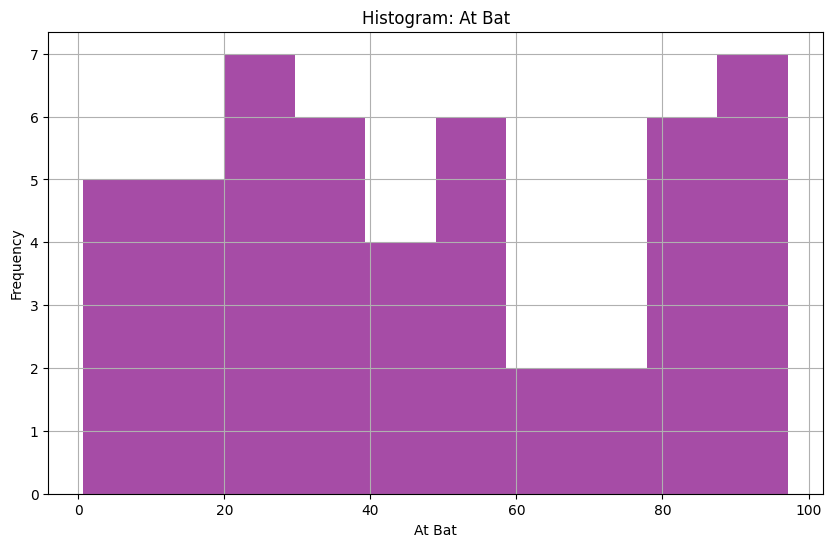

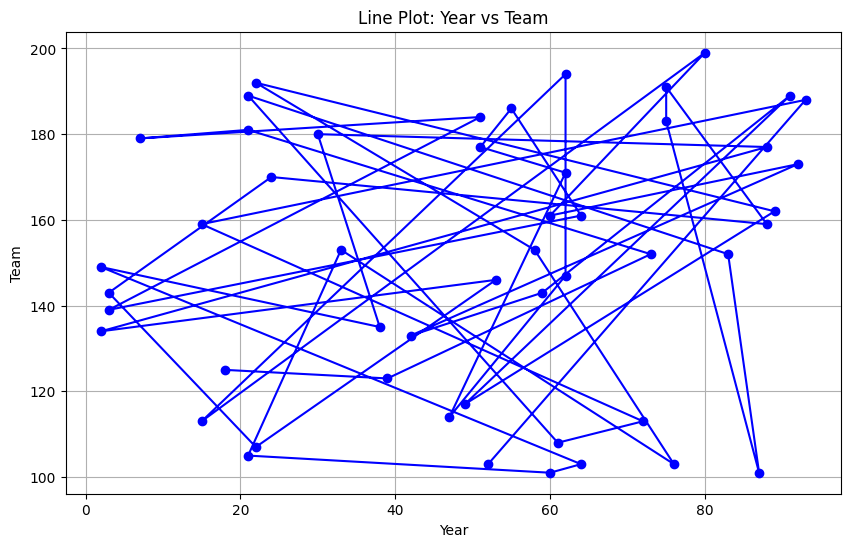

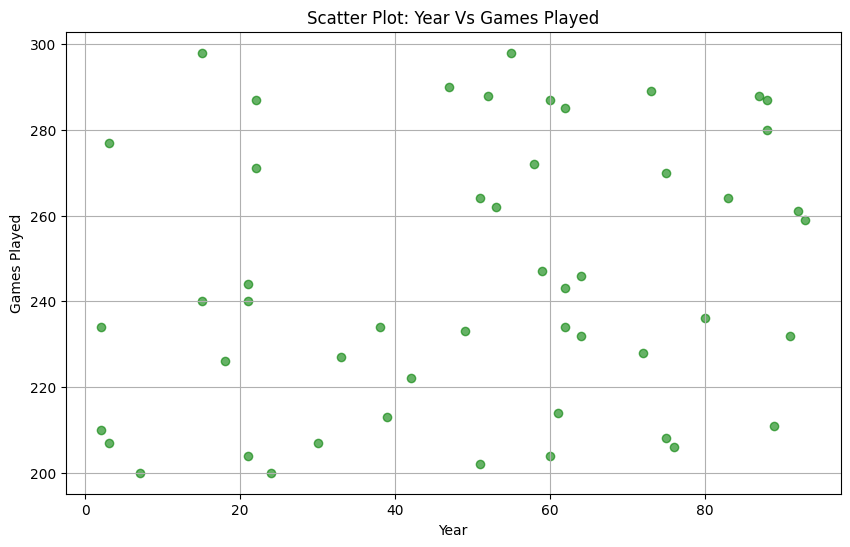

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
df_cleaned = pd.DataFrame({
    0: np.random.randint(1, 100, 50),  
    1: np.random.randint(100, 200, 50),
    2: np.random.randint(200, 300, 50), 
    3: np.random.rand(50) * 100        
})

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned[3], bins=10, color='purple', alpha=0.7)
plt.title('Histogram: At Bat')
plt.xlabel('At Bat')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned[0], df_cleaned[1], marker='o', linestyle='-', color='blue')
plt.title('Line Plot: Year vs Team')
plt.xlabel('Year')
plt.ylabel('Team')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[0], df_cleaned[2], color='green', alpha=0.6)
plt.title('Scatter Plot: Year Vs Games Played')
plt.xlabel('Year')
plt.ylabel('Games Played')
plt.grid(True)
plt.show()
